# Module 3, Lesson 1 #

# Cleaning the Data  #

You might be asking - "I've seen LOTS of languages out there - why Python?" - Great question.. and in this lesson you'll learn one of Python's many strengths - it works with missing data!  Many high end languages just cannot handle missing values, but Python does.  So even after you develop your high end model in another language, you might still have to work with Python to clean up your data to update your model!

## Data Sourcing ##
Data comes 2 ways - you collect it yourself, which, in some situations, can be ideal - you know what the assumptions were made when designing the data collection, but it is also a ton of hard work, and you might not have the resources.  But you know how clean the data is.  The other way you can get data is from someone else, or multiple someones, that is, you can mine their data.  When that happens, you need to edit it to find the missing data, and then make the tough call whether to delete or edit the data.  We've already talked about the ethics of editing data - are we introducing biases?
You will also need to edit each dataset so that the parameters are similar - if one is collected in inches and yards, and another is in centimeters and meters, you can't directly compare them without doing a conversion on one.  

Early on, you'll want to define some sort of data dictionary, to make sure that all your consolidated data is consistent.  In this lesson, we will find empty fields, and either delete it if too much is missing in a single record, or replace it with a mean/median.

### Data for this lesson ###
First, let's talk about the new data set, from Kaggle.  It's a Russian real estate data from one of their premier banks.  It was used in a Data Science competition to predict the price of specific apartments based on lots of parameters. It has 2 sets of data, a training set and a test set, both of which are posted on Blackboard.  

### Assignment ###
Create your own Jupyter Notebook, download the data files from BB and put them in the appropriate directory, type all of the examples and exercises into it.  Run each section appropriately.

We import the two libraries we used last time (pandas and numpy) but add two more - seaborn and matplotlib - both are graphing/visualization libraries.
We define a default figure size.

__Initialization:__

In [1]:
# Setup
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize']=(12,8)


Making sure that the train data set is in the right directory, we read it and get an understanding of the structure.

__Example 1:__

In [2]:
# Example 1
#read the data
df = pd.read_csv("train.csv")  # df stands for data frame and is just a variable name
                               # it actually means more, but you'll cover that in another class
display(df.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   id                                     int64  
 1   timestamp                              object 
 2   full_sq                                int64  
 3   life_sq                                float64
 4   floor                                  float64
 5   max_floor                              float64
 6   material                               float64
 7   build_year                             float64
 8   num_room                               float64
 9   kitch_sq                               float64
 10  state                                  float64
 11  product_type                           object 
 12  sub_area                               object 
 13  area_m                                 float64
 14  raion_popul                            int64  
 15  g

None

This is a decent size data set, 30471 rows and 292 columns.  I did post the data_dictionary.txt which describes what each column means.  Remember, it's a data base about real estate, so some of these make sense, and, because it's 292 columns, there are MANY tracking options, like - swim_pool_km (132) - the distance in km to the nearest swimming pool.  

Now let's look at what the sample content is.

__Example 2:__

In [3]:
# Example 2
display(df.head(10))

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


Interesting..   Great information, but there are ALOT of _NaN_ which stands for 'Not a Number' - either a character or missing.  Neither is good!

Now let's look at the shape and data types of the data.

__Example 3:__

In [4]:
# Example 3
print(df.shape)      # this prints the overall data size
print(df.dtypes)     # this prints the type of data 

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


And let's keep track of the numeric columns

__Example 4:__

In [5]:
# Example 4
df_numeric = df.select_dtypes(include=[np.number])   # here we're checking for numbers in the data
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

All of the above columns are numeric data - a LOT!

And the non-numeric ones

__Example 5:__

In [6]:
# Example 5
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


Not so many of these, but they are their own challenge.

# Let's look for missing data #
## 1.  Missing Data Heatmap ##

A heatmap is a visualization that is good for showing a wide range of values, but here we use it for binary - present or not.  It's better for a smaller number of columns, but we can demo it here.

The horizontal axis is the feature name (column), the vertical axis is the number of observations - the yellow is missing data and the blue represents data.

__Example 6:__

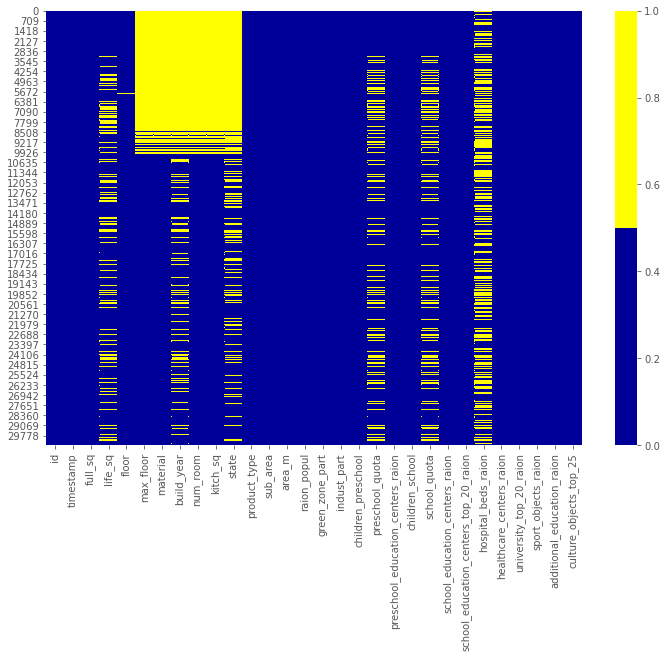

In [7]:
# Example 6
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From this, life_sq is missing data throughout almost the entire set, while max_floor through state didn't start until about row 8000.  floor is missing a few data points, but nothing after about 8500.  This is good for estimating what state your data set is in - is it mainly present or are the important parts missing?  The results should help you decide whether you want to proceed with this data set or is too much missing.


## 1.  Missing data Percentage List ##

For larger datasets, you can list out, by feature, the percentage of data missing.  This is good if the visualization takes a long time, but you have to look at each one...

Here, isnull is checking each data field to see if there is something present or not.

__Example 7:__

In [8]:
# Example 7
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

The actual amount of data that is missing is listed.

## 3.  Missing Data Histogram ##

Another visualization which shows summarizes the amount of records with data missing is the Missing Data histogram.  

__Example 8:__

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

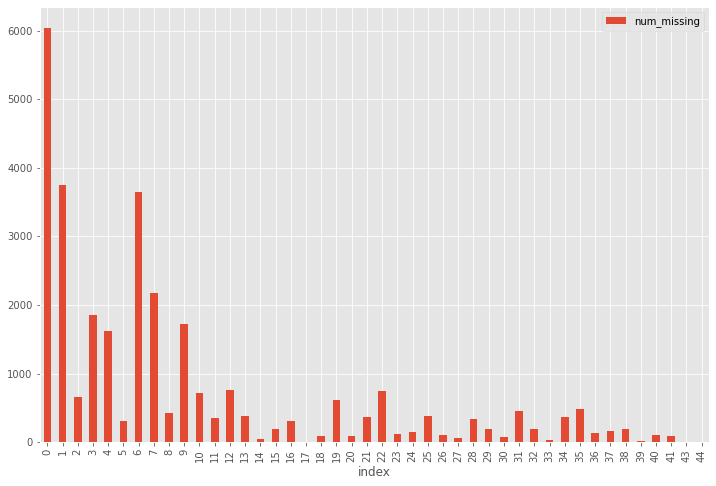

In [9]:
# Example 8
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')



How to read this?  The x-axis is the number of fields missing in any one data set.  The y-axis is the number of records.  From this, there are over 6k records that have data in every column, and none that have 17 fields missing.  Notice that this does NOT tell you which one of the fields is missing. 

Now comes the design considerations - what do we want to do or what can be done with all this missing data.  This requires knowing what the desired end result will be - a model, or will it be used specifics.  If the specifics data fields that are missing aren't needed, they can be deleted.  Or the specific observations that are more missing than present.  All these are options to be considered.

### Delete the Row ###
Let's say we want to create a new dataset deleting those observations with more than 35 features missing.  And now we can process this new dataset.

__Example 9:__

In [10]:
# Example 9
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

### Delete the column ###  

Contrary to above, if we decide that a particular parameter is not necessary or too many are missing, we can delete a parameter and then process that data.

__Example 10:__


In [11]:
# Example 10
# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

### Imput the Missing ###

Replace the missing values with something, using a method we talked about - mean or median (for example) for a numerical value or mode for a categorical value.

--Note:  When 'fixing' in this content, we're not inputting the data - the correct term IS imput--

__Example 11:__

In [12]:
# Example 11
# replace missing values with the median.
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)


30.0


This puts the value '30.0' in for N/A in life_sq.  

Now let's do something similar for all of the numerical data.

__Example 12:__

In [13]:
# Example 12
# imput the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

Okay, so, from a programming perspective, that code looks funny.. Python is very sensitive to spaces, and the indents are what is completed in the loops.  When you stop indenting, the loop is over.

Now do the same thing for categorical data.  We're going to replace with the 'mode' - most frequent data.

__Example 13:__

In [14]:
# Example 13
# imput the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

## Replace the missing values ##
For category values, we're now going to replace with MISSING, and numerical values with a particular selected value, in this case -999.

__Example 14:__

In [15]:
# Example 14
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

## Now let's look at unnecessary data ##

Depending on your end result, you might want to keep duplicates, otherwise, it is good to get rid of them.  Unnecessary data doesn't add value.

### Uninformative/Repetitive ##

Sometimes we have multiple rows with the same values.

We can identify those by creating a list of parameters with the same value.  

Here we find features that over 95% of the rows have the same value.

__Example 15:__


In [16]:
# Example 15
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

Now we can look at each variable and decide whether it is valuable or not.  Previously, we have deleted columns.

## Irrelevant ## 

The data needs to contribute.  If it doesn't, remove it.  This is done by looking at all the parameters.  For example, in this data set, the temperature in Toronto doesn't contribute, so remove it.

## Duplicates ##

Copies of the same observation - two main types.

### Features based ###

Find these by removing the unique identifer (id).  Then create a new dataset by dropping the duplicates.  Compare the shapes of the two to determine how many duplicates.

__Example 16:__

In [17]:
# Example 16
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


Same number of columns (since we removed the unique identifier (id), and the number of rows changed was 10 (30471-30761).

### Key Features Based ###

For a housing market, there is a very small chance that two transactions with the same square footage, same price and same build year actually happened, so we're going to remove those.

Here is where we have to know our data.  We are now going to generate a list of parameters that, statistically, should not happen, and call them critical features.

__Example 17:__

In [18]:
# Example 17
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-10-22  61       30.0     18.0   1979.0      2.0       8248500      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2013-04-03  42       30.0     2.0    1979.0      2.0       3444000      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-05-22  68       30.0     2.0    1979.0      2.0       5406690      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2012-09-05  43       30.0     21.0   1979.0      2.0       6229540      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2013-06-24  40       30.0     12.0   1979.0

We can drop these, based on these critical features.

__Example 18:__

In [19]:
# Example 18
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30455, 344)


We've dropped another 16 (30471-30455).

### Standardizing ###

We can now apply standards to clean up our data.  Case management (CAPS vs lowercase) is the bane of data scientists.  Python is case sensitive.  Let's look at the sub_area parameter case, and make everything lowercase.

__Example 19:__

In [20]:
# Example 19
df['sub_area'].value_counts(dropna=False)

# make everything lower case.
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie kievskij                   2
poselenie shhapovskoe                2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

Another standard to apply to clean up is formats.  This is currently saved in string format - let's change to DateTime.  timestamp is the parameter we're going to check.

__Example 20:__

In [21]:
# Example 20
df


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing,sub_area_lower
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,9,bibirevo
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,nagatinskij zaton
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,tekstil'shhiki
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,7,mitino
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,basmannoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,False,False,False,False,False,False,False,False,1,otradnoe
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,False,False,False,False,False,False,False,False,0,tverskoe
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,False,False,False,False,False,False,False,False,21,poselenie vnukovskoe
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,False,False,False,False,False,False,False,False,0,obruchevskoe


Convert and extract date and time values by using the code.  Then we can also break it out by month or year.

__Example 21:__

In [22]:
# Example 21
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


So we can tell what years and months these sales.  2014 was a good year, and December was a busy month. 

This data set doesn't have any examples of this subsequent cleaning techniques, so we have to create a new one.  Again, we'll call it df.

This data set is Canadian addresses.
What we are doing is looking for the 'distance' from probably misspellings to correct spellings.

__Example 22:__

In [23]:
# Example 22
from nltk.metrics import edit_distance



Other standards we can apply include the categories.  A category has a limited number of values, but typograpical errors increase that number.  Let's check for typos to make sure we have the right number of values in a category.

__Example 23:__

In [25]:
# Example 23
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


To handle this, we find wrong ones and replace with correct ones.

__Example 24:__

In [26]:
# Example 24
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


Addresses can be standardized also.  The Canadian housing dataset is clean, so create one specifically for this example.

__Example 25:__

In [27]:
# Example 25
# no address column in the housing dataset. So create one to show the code.
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


Messy!

Run this code to lowercase the letters, remove white space, delete periods and 
standardize wordings.

__Example 26:__


In [28]:
# Example 26
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave


These are common activities in Data Science - cleaning the data is very important for model development.

## Exercise ##
Using the titanic data we used previously, determine how much is missing, and use the processes demonstrated here to clean it.  Remove 95% of the missing elements, describing which was removed and make a case of WHY it was removed.  The cleaned up data will be used for future insurance reasons.